Mushroom identification


In [1]:
!wget https://keplab.mik.uni-pannon.hu/images/mo106/MO_106.zip

--2022-12-22 11:14:13--  https://keplab.mik.uni-pannon.hu/images/mo106/MO_106.zip
Resolving keplab.mik.uni-pannon.hu (keplab.mik.uni-pannon.hu)... 193.6.33.55
Connecting to keplab.mik.uni-pannon.hu (keplab.mik.uni-pannon.hu)|193.6.33.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2133736853 (2.0G) [application/zip]
Saving to: ‘MO_106.zip’

MO_106.zip          100%[===================>]   1.99G  18.2MB/s    in 1m 46s  

2022-12-22 11:16:01 (19.1 MB/s) - ‘MO_106.zip’ saved [2133736853/2133736853]



In [ ]:
!unzip /content/MO_106.zip

In [3]:
!pip install super_gradients==3.0.0 gwpy &> /dev/null

!pip install albumentations  &> /dev/null

In [4]:
!pip install matplotlib==3.1.1 --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.8/37.8 MB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
super-gradients 3.0.0 requires matplotlib>=3.3.4, but you have matplotlib 3.1.1 which is incompatible.
gwpy 3.0.2 requires matplotlib>=3.3.0, but you have matplotlib 3.1.1 which is incompatible.


In [5]:
import os
import numpy as np 
import pandas as pd
import torch
import torchvision
import super_gradients
from pathlib import Path, PurePath

from PIL import Image
import pprint
import matplotlib.pyplot as plt
from torchvision.io import read_image
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader
from torchvision.transforms import Resize
from torchvision import transforms

import albumentations as A
from albumentations.pytorch import ToTensorV2

from super_gradients import init_trainer, Trainer
from super_gradients.common import MultiGPUMode
from super_gradients.training.utils.distributed_training_utils import setup_gpu_mode
from super_gradients.training import Trainer
from super_gradients.training import training_hyperparams

from super_gradients.training import models
from super_gradients import Trainer

You did not mention an AWS environment.You can set the environment variable ENVIRONMENT_NAME with one of the values: development,staging,production
deci_platform_sg_logger -WARNING- Failed to import deci_lab_client
callbacks -WARNING- Failed to import deci_lab_client
quantization_utils -WARNING- Failed to import pytorch_quantization
env_sanity_check -INFO- ** A sanity check is done when importing super_gradients for the first time. **
-> You can see the details by setting the env variable DISPLAY_SANITY_CHECK=True prior to import.


In [ ]:
pd.read_csv("/content/image_stats.csv")

,avg_area,avg_first_dim,avg_second_dim,first_dim_stdev,second_dim_stdev,area_stdev,min_area,max_area,min_first_dim,min_second_dim,max_first_dim,max_second_dim,smallest_res,greatest_res
0,300085.595395,608.793574,499.318763,70.00038,78.340185,32405.409443,12610,409600,97,109,640,640,97x130,640*640


In [ ]:
labels = []
Id= []
for x in [os.path.join("/content/MO_106/", dir) for dir in os.listdir("/content/MO_106")]:
  nlyfiles = [f for f in os.listdir(x) if os.path.isfile(os.path.join(x, f))]
  for name in nlyfiles:
    # labels.append("_".join(x.split("/")[-1].split(" ")))
    labels.append(x.split("/")[-1])
    Id.append(name)

In [ ]:
"_".join("/content/MO_106/Leucoagaricus americanus".split("/")[-1].split(" "))

'Leucoagaricus_americanus'

In [ ]:
import pandas as pd

df = pd.DataFrame({"Id": Id, "Labels": labels})
df

,Id,Labels
0,Psilocybe cubensis_185.jpg,Psilocybe cubensis
1,Psilocybe cubensis_3.jpg,Psilocybe cubensis
2,Psilocybe cubensis_5.jpg,Psilocybe cubensis
3,Psilocybe cubensis_11.jpg,Psilocybe cubensis
4,Psilocybe cubensis_210.jpg,Psilocybe cubensis
...,...,...
29095,Psilocybe cyanescens_1.jpg,Psilocybe cyanescens
29096,Psilocybe cyanescens_208.jpg,Psilocybe cyanescens
29097,Psilocybe cyanescens_180.jpg,Psilocybe cyanescens
29098,Psilocybe cyanescens_256.jpg,Psilocybe cyanescens


In [ ]:
df.to_csv("/content/drive/MyDrive/project/mushroom.csv", index=False)

In [ ]:
df.Labels.nunique()

106

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/project/mushroom.csv")

In [ ]:

import numpy as np
n = len(df)

idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

# n_val = int(n * 0.2)
n_test = int(n * 0.2)
# n_train = n - n_val - n_test

n_train = n - n_test

# df = df_cols.drop(columns='median_house_value')

# df_train = df.iloc[idx[:n_train]]
# df_val = df.iloc[idx[n_train:n_train+n_val]]

df_train = df.iloc[idx[:n_train]]


df_test = df.iloc[idx[n_train:]]



In [8]:
df_train.to_csv("/content/drive/MyDrive/project/df_train.csv", index=False)
# df_val.to_csv("/content/drive/MyDrive/project/df_val.csv", index=False)
df_test.to_csv("/content/drive/MyDrive/project/df_test.csv", index=False)

NameError: ignored

In [6]:
import pandas as pd
df_train= pd.read_csv("/content/drive/MyDrive/project/df_train.csv")
# df_val.to_csv("/content/drive/MyDrive/project/df_val.csv", index=False)
df_test = pd.read_csv("/content/drive/MyDrive/project/df_test.csv")

In [ ]:
class config:
    EXPERIMENT_NAME = 'mushroom_classification'
    MODEL_NAME = 'vit_base'
    CHECKPOINT_DIR = 'checkpoints'
    WEIGHTS = "imagenet"
    TRAINING_PARAMS = "training_hyperparams/imagenet_vit_train_params"
    NUM_CLASSES = 106
    BATCH_SIZE = 16

    # specify the paths to training and validation set 
    # IMAGE_PATH = '../input/kitchenware-classification/images'
    IMAGE_PATH = "/content/MO_106"
    TRAIN_DATA = '/content/drive/MyDrive/project/df_train.csv'
    TEST_DATA = '/content/drive/MyDrive/project/df_test.csv'

    

    # set the input height and width
    INPUT_HEIGHT = 224
    INPUT_WIDTH = 224

    # set the input height and width
    IMAGENET_MEAN = [0.485, 0.456, 0.406]
    IMAGENET_STD = [0.229, 0.224, 0.225]

    NUM_WORKERS = os.cpu_count()

    DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
trainer = Trainer(experiment_name=config.EXPERIMENT_NAME, ckpt_root_dir=config.CHECKPOINT_DIR)

model = models.get(model_name=config.MODEL_NAME, num_classes=config.NUM_CLASSES, pretrained_weights=config.WEIGHTS)

In [ ]:
training_params =  training_hyperparams.get(config.TRAINING_PARAMS)

/usr/local/lib/python3.8/dist-packages/super_gradients/training/training_hyperparams/training_hyperparams.py:24: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  with initialize_config_dir(config_dir=pkg_resources.resource_filename("super_gradients.recipes", "")):
/usr/local/lib/python3.8/dist-packages/hydra/_internal/defaults_list.py:251: UserWarning: In 'training_hyperparams/imagenet_vit_train_params': Defaults list is missing `_self_`. See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/default_composition_order for more information
  warnings.warn(msg, UserWarning)


In [ ]:
# leaving it at a low number for demo purposes, you should make this bigger as big as 100 epochs
training_params["max_epochs"] = 10

# enable zero weight decay in batch norm and bias
training_params["zero_weight_decay_on_bias_and_bn"] = True

# this challenge only has 6 classes, monitoring top 5 accuracy won't make sence. monitor only accuracy
training_params['train_metrics_list'] = ['Accuracy']
training_params['valid_metrics_list'] = ['Accuracy']

# enable exponential moving average, it's turned off by default
training_params['ema'] = True

# you can also experiment with the parameters for EMA
# training_params['ema_params']: {'decay': 0.9999, 'beta': 15, 'exp_activation': True}

# Enable label-smoothing cross-entropy, you can experiment with the values for smooth_eps
training_params["criterion_params"] = {'smooth_eps': 0.1} 

# enable checkpoint averaging, it's turned off by default
training_params['average_best_models'] = True

# no launch of tensorboard
training_params["sg_logger_params"]["launch_tensorboard"] = False

# precise batchnorm is turned off by default, you can toggle to True and examine your results
# training_params["precise_bn"] = False 

# if you choose to use precise batch norm you will also need to specify the size
# training_params['precise_bn_batch_size']= None

#  You can change the initial learning rate to some other value if you'd like
# training_params['initial_lr']= 0.03

In [ ]:
le = LabelEncoder()
df_train['targets'] = le.fit_transform(df_train['Labels'])

In [ ]:
train_df, val_df = train_test_split(df_train,  stratify= df_train['targets'], test_size=.10, shuffle=True, random_state=42)

In [ ]:
train_df

In [ ]:
class MushroomDataset(Dataset):
    def __init__(self, dataframe , img_dir, split, transform = None):
        self.img_labels = dataframe 
        self.img_dir = img_dir
        self.split = split
        self.transform = transform
        
    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self , idx):
        if self.split in ['train', 'val']:
            # img_path = os.path.join(self.img_dir , self.img_labels.iloc[idx, 1], self.img_labels.iloc[idx, 2])
            # img_path = os.path.join(self.img_dir , self.img_labels.iloc[idx,1].replace("_", " "), self.img_labels.iloc[idx, 0])
            img_path = os.path.join(self.img_dir , self.img_labels.iloc[idx,1], self.img_labels.iloc[idx, 0])
            label = self.img_labels.iloc[idx, 2]
        else:
            # img_path = os.path.join(self.img_dir , self.img_labels.iloc[idx, 1])
            # img_path = os.path.join(self.img_dir , self.img_labels.iloc[idx,1].replace("_", " "), self.img_labels.iloc[idx, 0])
            img_path = os.path.join(self.img_dir , self.img_labels.iloc[idx,1], self.img_labels.iloc[idx, 0])

            
        original_image = Image.open(img_path)
        image = np.array(original_image)
        
        if self.transform:
            image = self.transform(image=image)['image']
            
        if self.split in ['train', 'val']: 
            return image, label 
        else:
            return image

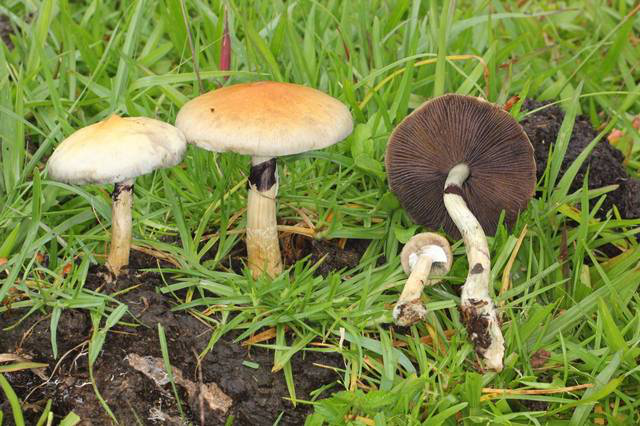

In [ ]:
img_path = os.path.join(config.IMAGE_PATH, df.iloc[0,1].replace("_", " "), df.iloc[0,0])
Image.open(img_path)

In [ ]:
# initialize our data augmentation functions
make_tensor = ToTensorV2()

normalize = A.Normalize(mean=config.IMAGENET_MEAN, 
                        std=config.IMAGENET_STD)

resize = A.Resize(height=config.INPUT_HEIGHT,
                  width=config.INPUT_WIDTH)

horizontal_flip = A.HorizontalFlip(p=0.50)

flip = A.Flip(p=0.50)

random_ninety = A.RandomRotate90()

random_crop = A.RandomCrop(height=config.INPUT_HEIGHT,
                           width=config.INPUT_WIDTH,
                           p=0.75)

hue_saturation = A.HueSaturationValue(p=.5)

iso_noise = A.ISONoise(p=.5)

color_jitter = A.ColorJitter(p=.5)

emboss = A.Emboss(p=.5)

channel_shuffle = A.ChannelShuffle(p=.5)

randomly_choose_one = A.OneOf([flip, 
                               random_ninety, 
                               iso_noise,
                               color_jitter,
                               emboss,
                               hue_saturation,
                               channel_shuffle], p=.50)

# initialize our training and validation set data augmentation pipeline
train_transforms = A.Compose([
  resize, 
  horizontal_flip, 
  random_crop,
  randomly_choose_one,
  normalize,
  make_tensor
])

val_transforms = A.Compose([resize, normalize, make_tensor])

In [ ]:
train_data = MushroomDataset(train_df , config.IMAGE_PATH , 'train', transform = train_transforms)
val_data = MushroomDataset(val_df , config.IMAGE_PATH , 'val', transform = val_transforms)
test_data = MushroomDataset(df_test, config.IMAGE_PATH, 'test',transform = val_transforms)

train_dataloader = DataLoader(train_data, batch_size = config.BATCH_SIZE , shuffle = True)
val_dataloader = DataLoader(val_data, batch_size = config.BATCH_SIZE, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = config.BATCH_SIZE, shuffle = False)

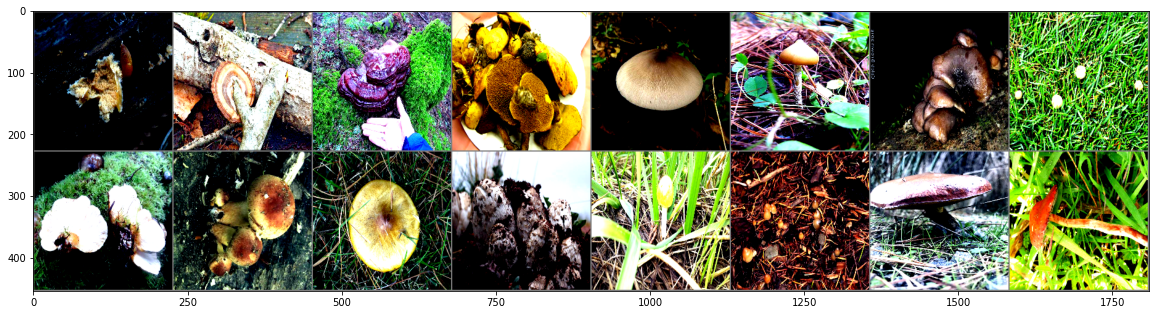

In [ ]:
def show_img(img):
    plt.figure(figsize=(20,16))
    img = img * 0.5 + 0.5  
    npimg = np.clip(img.numpy(), 0., 1.)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

data = iter(train_dataloader)
# images, labels = data.next()
images, labels = next(data)
show_img(torchvision.utils.make_grid(images))

In [ ]:
trainer.train(model=model, 
              training_params=training_params, 
              train_loader=train_dataloader,
              valid_loader=val_dataloader)

sg_trainer -INFO- Using EMA with params {'decay': 0.9999, 'beta': 15, 'exp_activation': True}
optimizer_utils -WARNING- Module class: <class 'torch.nn.modules.normalization.LayerNorm'>, have a `bias` parameter attribute but is not instance of torch primitive modules, this bias parameter will be part of param group with zero weight decay.
optimizer_utils -WARNING- Module class: <class 'torch.nn.modules.normalization.LayerNorm'>, have a `bias` parameter attribute but is not instance of torch primitive modules, this bias parameter will be part of param group with zero weight decay.
optimizer_utils -WARNING- Module class: <class 'torch.nn.modules.normalization.LayerNorm'>, have a `bias` parameter attribute but is not instance of torch primitive modules, this bias parameter will be part of param group with zero weight decay.
optimizer_utils -WARNING- Module class: <class 'torch.nn.modules.normalization.LayerNorm'>, have a `bias` parameter attribute but is not instance of torch primitive mod

Train epoch 0:   0%|          | 0/1310 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/torch/cuda/memory.py:395: FutureWarning: torch.cuda.memory_cached has been renamed to torch.cuda.memory_reserved
  warnings.warn(
Validation epoch 0: 100%|██████████| 146/146 [00:43<00:00,  3.34it/s]


SUMMARY OF EPOCH 0
├── Training
│   └── Labelsmoothingcrossentropyloss = 2.1688
└── Validation
    ├── Accuracy = 0.7784
    └── Labelsmoothingcrossentropyloss = 1.5525

base_sg_logger -INFO- Checkpoint saved in checkpoints/mushroom_classification/ckpt_best.pth
sg_trainer -INFO- Best checkpoint overriden: validation Accuracy: 0.7783505320549011


Validation epoch 1: 100%|██████████| 146/146 [00:43<00:00,  3.39it/s]


SUMMARY OF EPOCH 1
├── Training
│   └── Labelsmoothingcrossentropyloss = 1.7093
│       ├── Best until now = 2.1688 (↘ -0.4595)
│       └── Epoch N-1      = 2.1688 (↘ -0.4595)
└── Validation
    ├── Accuracy = 0.7844
    │   ├── Best until now = 0.7784 (↗ 0.006)
    │   └── Epoch N-1      = 0.7784 (↗ 0.006)
    └── Labelsmoothingcrossentropyloss = 1.5054
        ├── Best until now = 1.5525 (↘ -0.0471)
        └── Epoch N-1      = 1.5525 (↘ -0.0471)

base_sg_logger -INFO- Checkpoint saved in checkpoints/mushroom_classification/ckpt_best.pth
sg_trainer -INFO- Best checkpoint overriden: validation Accuracy: 0.7843642830848694


Validation epoch 2: 100%|██████████| 146/146 [00:42<00:00,  3.41it/s]


SUMMARY OF EPOCH 2
├── Training
│   └── Labelsmoothingcrossentropyloss = 1.4197
│       ├── Best until now = 1.7093 (↘ -0.2896)
│       └── Epoch N-1      = 1.7093 (↘ -0.2896)
└── Validation
    ├── Accuracy = 0.8428
    │   ├── Best until now = 0.7844 (↗ 0.0584)
    │   └── Epoch N-1      = 0.7844 (↗ 0.0584)
    └── Labelsmoothingcrossentropyloss = 1.3235
        ├── Best until now = 1.5054 (↘ -0.1819)
        └── Epoch N-1      = 1.5054 (↘ -0.1819)

base_sg_logger -INFO- Checkpoint saved in checkpoints/mushroom_classification/ckpt_best.pth
sg_trainer -INFO- Best checkpoint overriden: validation Accuracy: 0.842783510684967


Validation epoch 3: 100%|██████████| 146/146 [00:43<00:00,  3.32it/s]


SUMMARY OF EPOCH 3
├── Training
│   └── Labelsmoothingcrossentropyloss = 1.2169
│       ├── Best until now = 1.4197 (↘ -0.2028)
│       └── Epoch N-1      = 1.4197 (↘ -0.2028)
└── Validation
    ├── Accuracy = 0.8746
    │   ├── Best until now = 0.8428 (↗ 0.0318)
    │   └── Epoch N-1      = 0.8428 (↗ 0.0318)
    └── Labelsmoothingcrossentropyloss = 1.2533
        ├── Best until now = 1.3235 (↘ -0.0702)
        └── Epoch N-1      = 1.3235 (↘ -0.0702)

base_sg_logger -INFO- Checkpoint saved in checkpoints/mushroom_classification/ckpt_best.pth
sg_trainer -INFO- Best checkpoint overriden: validation Accuracy: 0.8745704293251038


Validation epoch 4: 100%|██████████| 146/146 [00:42<00:00,  3.46it/s]


SUMMARY OF EPOCH 4
├── Training
│   └── Labelsmoothingcrossentropyloss = 1.0799
│       ├── Best until now = 1.2169 (↘ -0.137)
│       └── Epoch N-1      = 1.2169 (↘ -0.137)
└── Validation
    ├── Accuracy = 0.8776
    │   ├── Best until now = 0.8746 (↗ 0.003)
    │   └── Epoch N-1      = 0.8746 (↗ 0.003)
    └── Labelsmoothingcrossentropyloss = 1.2178
        ├── Best until now = 1.2533 (↘ -0.0355)
        └── Epoch N-1      = 1.2533 (↘ -0.0355)

base_sg_logger -INFO- Checkpoint saved in checkpoints/mushroom_classification/ckpt_best.pth
sg_trainer -INFO- Best checkpoint overriden: validation Accuracy: 0.8775773048400879


Validation epoch 5: 100%|██████████| 146/146 [00:42<00:00,  3.44it/s]


SUMMARY OF EPOCH 5
├── Training
│   └── Labelsmoothingcrossentropyloss = 0.9672
│       ├── Best until now = 1.0799 (↘ -0.1128)
│       └── Epoch N-1      = 1.0799 (↘ -0.1128)
└── Validation
    ├── Accuracy = 0.8875
    │   ├── Best until now = 0.8776 (↗ 0.0099)
    │   └── Epoch N-1      = 0.8776 (↗ 0.0099)
    └── Labelsmoothingcrossentropyloss = 1.199
        ├── Best until now = 1.2178 (↘ -0.0188)
        └── Epoch N-1      = 1.2178 (↘ -0.0188)

base_sg_logger -INFO- Checkpoint saved in checkpoints/mushroom_classification/ckpt_best.pth
sg_trainer -INFO- Best checkpoint overriden: validation Accuracy: 0.8874570727348328


Validation epoch 6: 100%|██████████| 146/146 [00:42<00:00,  3.42it/s]


SUMMARY OF EPOCH 6
├── Training
│   └── Labelsmoothingcrossentropyloss = 0.8979
│       ├── Best until now = 0.9672 (↘ -0.0693)
│       └── Epoch N-1      = 0.9672 (↘ -0.0693)
└── Validation
    ├── Accuracy = 0.89
    │   ├── Best until now = 0.8875 (↗ 0.0026)
    │   └── Epoch N-1      = 0.8875 (↗ 0.0026)
    └── Labelsmoothingcrossentropyloss = 1.1886
        ├── Best until now = 1.199  (↘ -0.0104)
        └── Epoch N-1      = 1.199  (↘ -0.0104)

base_sg_logger -INFO- Checkpoint saved in checkpoints/mushroom_classification/ckpt_best.pth
sg_trainer -INFO- Best checkpoint overriden: validation Accuracy: 0.8900343775749207


Validation epoch 7: 100%|██████████| 146/146 [00:43<00:00,  3.37it/s]


SUMMARY OF EPOCH 7
├── Training
│   └── Labelsmoothingcrossentropyloss = 0.855
│       ├── Best until now = 0.8979 (↘ -0.0428)
│       └── Epoch N-1      = 0.8979 (↘ -0.0428)
└── Validation
    ├── Accuracy = 0.8922
    │   ├── Best until now = 0.89   (↗ 0.0021)
    │   └── Epoch N-1      = 0.89   (↗ 0.0021)
    └── Labelsmoothingcrossentropyloss = 1.1802
        ├── Best until now = 1.1886 (↘ -0.0084)
        └── Epoch N-1      = 1.1886 (↘ -0.0084)

base_sg_logger -INFO- Checkpoint saved in checkpoints/mushroom_classification/ckpt_best.pth
sg_trainer -INFO- Best checkpoint overriden: validation Accuracy: 0.8921821117401123


Validation epoch 8: 100%|██████████| 146/146 [00:43<00:00,  3.38it/s]


SUMMARY OF EPOCH 8
├── Training
│   └── Labelsmoothingcrossentropyloss = 0.8322
│       ├── Best until now = 0.855  (↘ -0.0228)
│       └── Epoch N-1      = 0.855  (↘ -0.0228)
└── Validation
    ├── Accuracy = 0.8922
    │   ├── Best until now = 0.8922 (↘ 0.0)
    │   └── Epoch N-1      = 0.8922 (↘ 0.0)
    └── Labelsmoothingcrossentropyloss = 1.1736
        ├── Best until now = 1.1802 (↘ -0.0066)
        └── Epoch N-1      = 1.1802 (↘ -0.0066)



Validation epoch 9: 100%|██████████| 146/146 [00:43<00:00,  3.39it/s]


SUMMARY OF EPOCH 9
├── Training
│   └── Labelsmoothingcrossentropyloss = 0.8243
│       ├── Best until now = 0.8322 (↘ -0.0079)
│       └── Epoch N-1      = 0.8322 (↘ -0.0079)
└── Validation
    ├── Accuracy = 0.8935
    │   ├── Best until now = 0.8922 (↗ 0.0013)
    │   └── Epoch N-1      = 0.8922 (↗ 0.0013)
    └── Labelsmoothingcrossentropyloss = 1.1694
        ├── Best until now = 1.1736 (↘ -0.0042)
        └── Epoch N-1      = 1.1736 (↘ -0.0042)

base_sg_logger -INFO- Checkpoint saved in checkpoints/mushroom_classification/ckpt_best.pth
sg_trainer -INFO- Best checkpoint overriden: validation Accuracy: 0.8934707641601562
sg_trainer -INFO- RUNNING ADDITIONAL TEST ON THE AVERAGED MODEL...


Validation epoch 10: 100%|██████████| 146/146 [00:56<00:00,  2.59it/s]


SUMMARY OF EPOCH 10
├── Training
│   └── Labelsmoothingcrossentropyloss = 0.8243
│       ├── Best until now = 0.8322 (↘ -0.0079)
│       └── Epoch N-1      = 0.8322 (↘ -0.0079)
└── Validation
    ├── Accuracy = 0.8913
    │   ├── Best until now = 0.8935 (↘ -0.0021)
    │   └── Epoch N-1      = 0.8935 (↘ -0.0021)
    └── Labelsmoothingcrossentropyloss = 1.1834
        ├── Best until now = 1.1694 (↗ 0.014)
        └── Epoch N-1      = 1.1694 (↗ 0.014)



In [ ]:
best_model = models.get(config.MODEL_NAME,
                        num_classes=config.NUM_CLASSES,
                        checkpoint_path=os.path.join(trainer.checkpoints_dir_path, "ckpt_best.pth"))





In [ ]:
torch.save(best_model, 'test.pth')

In [ ]:
model_test = torch.load( 'test.pth')
model_test.eval()

In [ ]:
df_test

,Id,Labels
0,Clitocybe nuda_31.jpg,Clitocybe nuda
1,Artomyces pyxidatus_334.jpg,Artomyces pyxidatus
2,Cerioporus squamosus_322.jpg,Cerioporus squamosus
3,Stropharia ambigua_110.jpg,Stropharia ambigua
4,Stereum ostrea_12.jpg,Stereum ostrea
...,...,...
5815,Panaeolina foenisecii_136.jpg,Panaeolina foenisecii
5816,Lacrymaria lacrymabunda_187.jpg,Lacrymaria lacrymabunda
5817,Cerioporus squamosus_534.jpg,Cerioporus squamosus
5818,Psilocybe muliercula_52.jpg,Psilocybe muliercula


In [ ]:
all_predictions = []
best_model.eval()
with torch.inference_mode():
    for index, batch in enumerate(test_dataloader):
        results = best_model(batch)
        soft_max = torch.softmax(results, dim=1)
        label = torch.argmax(soft_max, dim=1)
        transformed_labels = le.inverse_transform(label.numpy())
        all_predictions.extend(transformed_labels)

In [ ]:
all_predictions

['Clitocybe nuda',
 'Artomyces pyxidatus',
 'Cerioporus squamosus',
 'Stropharia ambigua',
 'Stereum ostrea',
 'Stereum ostrea',
 'Amanita persicina',
 'Pseudohydnum gelatinosum',
 'Stropharia ambigua',
 'Cantharellus californicus',
 'Schizophyllum commune',
 'Agaricus augustus',
 'Coprinellus micaceus',
 'Lycogala epidendrum',
 'Amanita persicina',
 'Psathyrella candolleana',
 'Mycena leaiana',
 'Pleurotus pulmonarius',
 'Mycena leaiana',
 'Suillus americanus',
 'Omphalotus olivascens',
 'Gymnopilus luteofolius',
 'Clitocybe nuda',
 'Panaeolus papilionaceus',
 'Lacrymaria lacrymabunda',
 'Grifola frondosa',
 'Tylopilus rubrobrunneus',
 'Coprinellus micaceus',
 'Hericium coralloides',
 'Cerioporus squamosus',
 'Chlorophyllum molybdites',
 'Bolbitius titubans',
 'Schizophyllum commune',
 'Phlebia tremellosa',
 'Pleurotus pulmonarius',
 'Suillus spraguei',
 'Flammulina velutipes',
 'Psilocybe cyanescens',
 'Grifola frondosa',
 'Amanita persicina',
 'Laccaria ochropurpurea',
 'Lactarius i

In [ ]:
df_test["predictions"]= all_predictions

In [ ]:
df_test.to_csv("/content/drive/MyDrive/project/test.csv")

In [ ]:
bentoml.pytorch.save_model(
    model_test,
    "mushroom_gradient"
)

TypeError: ignored

In [ ]:
bentoml.pytorch.save_model(
    best_model,
    "mushroom_gradient"
)

TypeError: ignored

In [7]:
!pip install -Uqq fastai timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 kB 26.7 MB/s eta 0:00:00


In [15]:
from fastai.vision.all import *
import timm

In [8]:
path = Path('/content/MO_106/')

In [ ]:
df_train.head()

,Id,Labels,targets
15656,Bolbitius titubans_226.jpg,Bolbitius_titubans,14
20624,Panellus stipticus_69.jpg,Panellus_stipticus,66
4730,Hygrophoropsis aurantiaca_64.jpg,Hygrophoropsis_aurantiaca,43
20599,Panellus stipticus_251.jpg,Panellus_stipticus,66
24567,Ganoderma tsugae_187.jpg,Ganoderma_tsugae,36


In [9]:
train = df_train.copy()


In [10]:
train["image"]= train.apply(lambda x: x["Labels"].replace("_", " ")+"/"+x["Id"] , axis=1                            )

In [ ]:
batch_tfms = [
    Brightness(max_lighting = 0.5, p = 0.4),
    Contrast(max_lighting = 0.5, p = 1),
    Saturation(max_lighting = 0.5, p = 0.4),
             # Zoom( draw=1.2, p= 0.4),
             # RandomErasing(p=0.2),
    Rotate(90, p= 0.4)
             ]

batch_tfms = [ 
    FlipItem (p=0.5),
    Rotate(90, p= 0.4),
    Zoom( draw=1.3, p= 0.4),
    # Brightness(max_lighting = 0.2, p = 0.4),
    # Warp(),
    # Contrast(max_lighting = 0.5, p = 1),
    # Saturation(max_lighting = 0.5, p = 0.4),
    
]
dls = ImageDataLoaders.from_df(train,  path, seed=123, bs=8,
                               fn_col='image', label_col='Labels',
                               item_tfms=[Resize(224)], batch_tfms=batch_tfms)

In [ ]:
# dls = ImageDataLoaders.from_df(train, path, seed=123, bs=32,
#                                fn_col='image', label_col='Labels',
#                                item_tfms=Resize(240), batch_tfms=Resize(224))

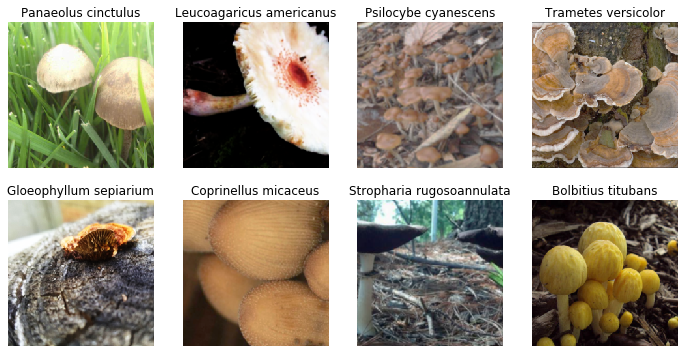

In [ ]:
dls.show_batch()

In [13]:
learn = vision_learner(dls, 'convnext_tiny_in22k', metrics=accuracy, path=".")

Downloading: "https://dl.fbaipublicfiles.com/convnext/convnext_tiny_22k_224.pth" to /root/.cache/torch/hub/checkpoints/convnext_tiny_22k_224.pth


In [ ]:
# import torch, gc
# gc.collect()
# torch.cuda.empty_cache()

SuggestedLRs(valley=0.0020892962347716093)

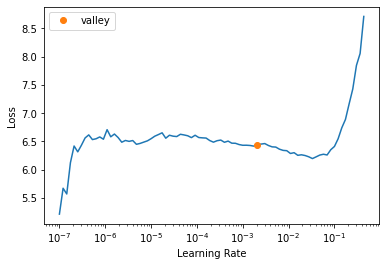

In [14]:
learn.lr_find()

In [15]:
learn.fine_tune(7, 0.0021)

epoch,train_loss,valid_loss,accuracy,time
0,1.960092,1.114927,0.680412,04:47


epoch,train_loss,valid_loss,accuracy,time
0,1.309196,0.694118,0.799399,08:02
1,1.099757,0.665870,0.801332,08:00
2,1.026968,0.568162,0.836555,07:59
3,0.769097,0.484868,0.852234,08:00
4,0.643014,0.437509,0.868771,08:01
5,0.503956,0.408785,0.880584,07:59
6,0.481999,0.403126,0.882302,08:02


In [ ]:
learn.fine_tune(12, 0.001)

epoch,train_loss,valid_loss,accuracy,time
0,1.717361,0.980129,0.723797,05:09


epoch,train_loss,valid_loss,accuracy,time
0,1.098582,0.774298,0.779210,11:44
1,0.905275,0.650841,0.814433,11:43
2,0.740699,0.568749,0.829253,11:43
3,0.598995,0.519479,0.848797,11:46
4,0.492694,0.480329,0.859966,11:43
5,0.393594,0.460920,0.865765,11:45
6,0.325308,0.448811,0.867053,11:45
7,0.244032,0.430710,0.874785,11:49
8,0.209627,0.425121,0.878651,11:45
9,0.175416,0.418966,0.881658,11:52


# code to check hash of images and see if there are duplicates using code shared by CLAMYTOE on kaggle

In [81]:
from collections import defaultdict
from hashlib import md5
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import PIL




project_dir = Path("/content/MO_106")
image_number = 0
hash_dict = defaultdict(list)
for dir_im in [os.path.join(path, x) for x in os.listdir("/content/MO_106") ]:
  img_dir = project_dir / dir_im
  for image in img_dir.glob('*.jpg'):
      image_number+=1 
      with image.open('rb') as f:
          img_hash = md5(f.read()).hexdigest()
          hash_dict[img_hash].append(image)
total_hash = len(hash_dict)
print(f"there are {image_number} images in the dataset and {total_hash} unique hashes")




there are 29100 images in the dataset and 29026 unique hashes


In [ ]:
hash_dict

In [16]:
learn.export('/content/drive/MyDrive/project/mushrooms_model_new.pkl')

In [16]:
learn = load_learner('/content/drive/MyDrive/project/mushrooms_model_new.pkl' )

In [13]:
df_train

,Id,Labels
0,Coprinellus micaceus_226.jpg,Coprinellus micaceus
1,Gymnopilus luteofolius_217.jpg,Gymnopilus luteofolius
2,Hypomyces lactifluorum_106.jpg,Hypomyces lactifluorum
3,Gymnopilus luteofolius_156.jpg,Gymnopilus luteofolius
4,Laetiporus sulphureus_45.jpg,Laetiporus sulphureus
...,...,...
23275,Schizophyllum commune_59.jpg,Schizophyllum commune
23276,Stropharia rugosoannulata_183.jpg,Stropharia rugosoannulata
23277,Tricholomopsis rutilans_240.jpg,Tricholomopsis rutilans
23278,Cerioporus squamosus_147.jpg,Cerioporus squamosus


In [ ]:
test = df_test.copy()
test["image"]= test.apply(lambda x: "MO_106"+"/"+x["Labels"].replace("_", " ")+"/"+x["Id"] , axis=1)

In [15]:
test

,Id,Labels,image
0,Clitocybe nuda_31.jpg,Clitocybe nuda,MO_106/Clitocybe nuda/Clitocybe nuda_31.jpg
1,Artomyces pyxidatus_334.jpg,Artomyces pyxidatus,MO_106/Artomyces pyxidatus/Artomyces pyxidatus_334.jpg
2,Cerioporus squamosus_322.jpg,Cerioporus squamosus,MO_106/Cerioporus squamosus/Cerioporus squamosus_322.jpg
3,Stropharia ambigua_110.jpg,Stropharia ambigua,MO_106/Stropharia ambigua/Stropharia ambigua_110.jpg
4,Stereum ostrea_12.jpg,Stereum ostrea,MO_106/Stereum ostrea/Stereum ostrea_12.jpg
...,...,...,...
5815,Panaeolina foenisecii_136.jpg,Panaeolina foenisecii,MO_106/Panaeolina foenisecii/Panaeolina foenisecii_136.jpg
5816,Lacrymaria lacrymabunda_187.jpg,Lacrymaria lacrymabunda,MO_106/Lacrymaria lacrymabunda/Lacrymaria lacrymabunda_187.jpg
5817,Cerioporus squamosus_534.jpg,Cerioporus squamosus,MO_106/Cerioporus squamosus/Cerioporus squamosus_534.jpg
5818,Psilocybe muliercula_52.jpg,Psilocybe muliercula,MO_106/Psilocybe muliercula/Psilocybe muliercula_52.jpg


In [23]:
tst_dl = dls.test_dl(test.loc[0:50, "image"])

In [43]:
tta = learn.tta(dl=tst_dl)
tta_preds, _ = tta
idxs = tta_preds.argmax(dim=1)
vocab = np.array(dls.vocab)
vocab[idxs]

array(['Clitocybe nuda', 'Artomyces pyxidatus', 'Cerioporus squamosus',
       'Stropharia ambigua', 'Stereum ostrea', 'Ganoderma applanatum',
       'Amanita persicina', 'Ganoderma applanatum', 'Stropharia ambigua',
       'Omphalotus olivascens', 'Schizophyllum commune',
       'Agaricus augustus', 'Coprinellus micaceus', 'Lycogala epidendrum',
       'Amanita persicina', 'Psathyrella candolleana', 'Mycena leaiana',
       'Pleurotus pulmonarius', 'Mycena leaiana', 'Suillus americanus',
       'Cantharellus californicus', 'Gymnopilus luteofolius',
       'Amanita amerirubescens', 'Panaeolus papilionaceus',
       'Lacrymaria lacrymabunda', 'Grifola frondosa',
       'Tylopilus rubrobrunneus', 'Coprinellus micaceus',
       'Hericium coralloides', 'Cerioporus squamosus',
       'Chlorophyllum molybdites', 'Bolbitius titubans',
       'Schizophyllum commune', 'Phlebia tremellosa',
       'Pleurotus pulmonarius', 'Suillus spraguei',
       'Flammulina velutipes', 'Psilocybe cyanescens',

In [39]:
test_50 = test.iloc[:51].copy()

In [44]:
test_50["result2"]= vocab[idxs]


In [45]:
test_50

,Id,Labels,image,result,result2
0,Clitocybe nuda_31.jpg,Clitocybe nuda,MO_106/Clitocybe nuda/Clitocybe nuda_31.jpg,Clitocybe nuda,Clitocybe nuda
1,Artomyces pyxidatus_334.jpg,Artomyces pyxidatus,MO_106/Artomyces pyxidatus/Artomyces pyxidatus_334.jpg,Artomyces pyxidatus,Artomyces pyxidatus
2,Cerioporus squamosus_322.jpg,Cerioporus squamosus,MO_106/Cerioporus squamosus/Cerioporus squamosus_322.jpg,Cerioporus squamosus,Cerioporus squamosus
3,Stropharia ambigua_110.jpg,Stropharia ambigua,MO_106/Stropharia ambigua/Stropharia ambigua_110.jpg,Stropharia ambigua,Stropharia ambigua
4,Stereum ostrea_12.jpg,Stereum ostrea,MO_106/Stereum ostrea/Stereum ostrea_12.jpg,Stereum ostrea,Stereum ostrea
5,Ischnoderma resinosum_92.jpg,Ischnoderma resinosum,MO_106/Ischnoderma resinosum/Ischnoderma resinosum_92.jpg,Ganoderma applanatum,Ganoderma applanatum
6,Amanita persicina_187.jpg,Amanita persicina,MO_106/Amanita persicina/Amanita persicina_187.jpg,Amanita persicina,Amanita persicina
7,Pseudohydnum gelatinosum_228.jpg,Pseudohydnum gelatinosum,MO_106/Pseudohydnum gelatinosum/Pseudohydnum gelatinosum_228.jpg,Pseudohydnum gelatinosum,Ganoderma applanatum
8,Stropharia ambigua_69.jpg,Stropharia ambigua,MO_106/Stropharia ambigua/Stropharia ambigua_69.jpg,Stropharia ambigua,Stropharia ambigua
9,Omphalotus olivascens_95.jpg,Omphalotus olivascens,MO_106/Omphalotus olivascens/Omphalotus olivascens_95.jpg,Omphalotus olivascens,Omphalotus olivascens


In [ ]:
!pip install -U git+https://github.com/bentoml/BentoML.git pyyaml

In [ ]:
learn = load_learner("mushrooms_model_5epoch.pkl" )

In [18]:
!pip install pickle5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pickle5: filename=pickle5-0.0.11-cp38-cp38-linux_x86_64.whl size=236276 sha256=2bb9309f5616e1f9ee27e0b389cd6255c3859e9fd7c2f80b8a8846e64afeb475
  Stored in directory: /root/.cache/pip/wheels/79/44/2d/7aaee2f1a53800e56b59c6d334ddd1c9a192772a9ae3fb33b8
Successfully built pickle5


In [40]:
from _pickle import Pickler 

In [43]:
from cloudpickle.cloudpickle_fast import CloudPickler, dumps, dump 

In [46]:
Pickler = CloudPickler

In [21]:
import pickle5 as pickle

In [61]:
import fastai.learner as learner
learner.Learner.export("test")

AttributeError: ignored

In [62]:
import bentoml
bentoml.fastai.save_model("fastai_mushroom_pred", learn)

AttributeError: ignored

In [64]:
cloudpickle.cloudpickle_fast.Pickler

_pickle.Pickler

In [27]:
import cloudpickle

In [28]:
cloudpickle.Pickler()

AttributeError: ignored

In [33]:
!pip install cloudpickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
cloudpickle.Pickler

AttributeError: ignored